# Análisis Conjunto de Indicadores Socioeconómicos en Sudamérica (Grupo 11)

Este notebook integra los trabajos individuales de los miembros del grupo, unificando los indicadores analizados: gasto en salud, empleo agrícola y educación femenina. El objetivo es explorar relaciones y patrones conjuntos, como si el análisis hubiera sido realizado colaborativamente.

---

## 1. Carga de datos de cada indicador

Los datos provienen de los archivos generados por cada integrante.

In [3]:
import pandas as pd

# Gasto en salud (% del PIB)
salud = pd.read_csv('gasto_salud/gasto_salud_sudamerica_2018_2024.csv')

# Empleo agrícola (% del total)
empleo = pd.read_csv('empleo rural/empleo_agricola_sudamerica.csv')

# Educación femenina (%)
educacion = pd.read_csv('educacion_femenina/educacion_femenina_sudamerica_2018_2024.csv')

# Mostrar ejemplos de los datos
print('Salud:')
display(salud.head())
print('Empleo:')
display(empleo.head())
print('Educación:')
display(educacion.head())

Salud:


,country,year,health_spending
0,Argentina,2018,10.291469
1,Argentina,2019,10.155511
2,Argentina,2020,10.450306
3,Argentina,2021,10.038322
4,Argentina,2022,9.863053


Empleo:


,País,Código País,Año,Empleo Agrícola (% total)
0,Argentina,ARG,2018,0.624305
1,Argentina,ARG,2019,0.609655
2,Argentina,ARG,2020,0.605510
3,Argentina,ARG,2021,0.570907
4,Argentina,ARG,2022,0.646133


Educación:


,Indicador,País,Año,Educación (%)
0,5,Bolivia,2018,53.48
1,4,Bolivia,2019,57.31
2,3,Bolivia,2020,58.08
3,2,Bolivia,2021,58.41
4,1,Bolivia,2022,56.27


## 2. Unificación de los DataFrames

Vamos a unificar los datos por país y año.

In [4]:
# Normalizar nombres de columnas y países
salud = salud.rename(columns={'country': 'País', 'year': 'Año', 'health_spending': 'Gasto Salud (%PIB)'})
empleo = empleo.rename(columns={'País': 'País', 'Año': 'Año', 'Empleo Agrícola (% total)': 'Empleo Agrícola (%)'})
educacion = educacion.rename(columns={'País': 'País', 'Año': 'Año', 'Educación (%)': 'Educación Femenina (%)'})

# Unir por País y Año (merge sucesivos)
df_merged = salud.merge(empleo[['País','Año','Empleo Agrícola (%)']], on=['País','Año'], how='outer')
df_merged = df_merged.merge(educacion[['País','Año','Educación Femenina (%)']], on=['País','Año'], how='outer')
df_merged = df_merged.sort_values(['País','Año'])
df_merged.reset_index(drop=True, inplace=True)
df_merged.head(10)

,País,Año,Gasto Salud (%PIB),Empleo Agrícola (%),Educación Femenina (%)
0,Argentina,2018,10.291469,0.624305,NaN
1,Argentina,2019,10.155511,0.609655,NaN
2,Argentina,2020,10.450306,0.605510,NaN
3,Argentina,2021,10.038322,0.570907,NaN
4,Argentina,2022,9.863053,0.646133,NaN
5,Argentina,2023,NaN,0.612884,NaN
6,Bolivia,2018,6.603994,31.070025,53.48
7,Bolivia,2019,6.887930,27.414421,57.31
8,Bolivia,2020,8.022581,30.000651,58.08
9,Bolivia,2021,8.159729,27.647413,58.41


## 3. Análisis exploratorio conjunto

Veamos la correlación y algunas visualizaciones entre los indicadores.

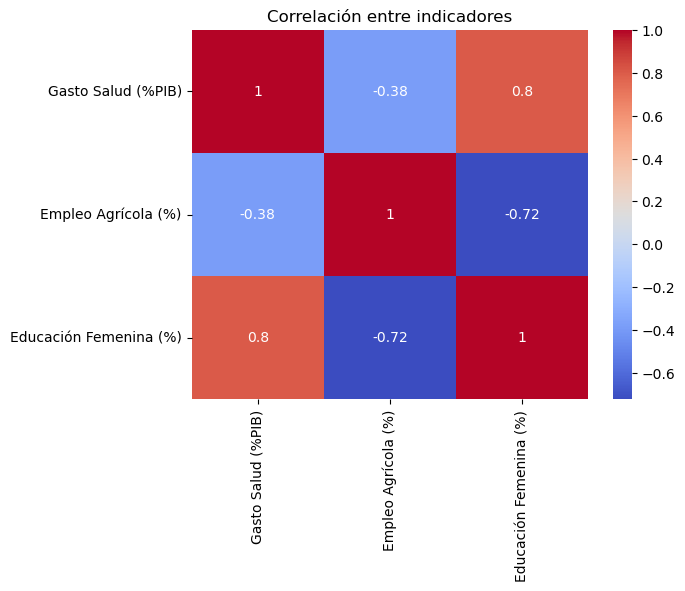

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de correlación
corr = df_merged[['Gasto Salud (%PIB)','Empleo Agrícola (%)','Educación Femenina (%)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlación entre indicadores')
plt.show()

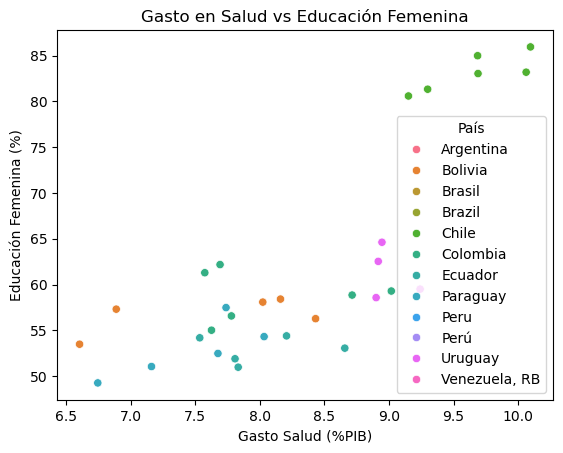

In [6]:
# Gráfico de dispersión: Gasto en salud vs Educación femenina
sns.scatterplot(data=df_merged, x='Gasto Salud (%PIB)', y='Educación Femenina (%)', hue='País')
plt.title('Gasto en Salud vs Educación Femenina')
plt.show()

## 4# Conclusiones con Enfoque en Desnutrición (Sudamérica)

## 🏥 Gasto en Salud y su impacto indirecto en la desnutrición:

- Existe una correlación positiva entre el **gasto público en salud** y la **educación femenina**, lo cual es relevante porque mejores sistemas de salud pública suelen incluir **programas de nutrición materno-infantil**.
- Los países con **mayor inversión en salud** podrían presentar **menores tasas de desnutrición**, al contar con mayor cobertura de:
  - Programas de prevención.
  - Vacunación infantil.
  - Controles de crecimiento.
  - Acceso a suplementos alimenticios.

---

## 🌾 Empleo Agrícola como doble filo:

- Un **alto empleo agrícola** puede reflejar una fuerte dependencia de las **economías rurales**, pero también evidencia **baja tecnificación** y **pobreza estructural**.
- Estas condiciones están frecuentemente asociadas con:
  - **Inseguridad alimentaria**.
  - **Desnutrición infantil**, especialmente en áreas rurales.
- Aunque se produzcan alimentos, en zonas con bajos rendimientos y escasos recursos, puede persistir la **carencia nutricional**.

---

## 🎓 Educación Femenina y su efecto preventivo:

- Se observa una **correlación positiva entre educación femenina y gasto en salud**, lo cual es un factor protector frente a la desnutrición.
- Las madres con **mayor nivel educativo** tienden a:
  - Tener mejor conocimiento sobre nutrición y salud.
  - Acceder con mayor frecuencia a servicios médicos y vacunas.
  - Promover mejores prácticas de alimentación en el hogar.
- Por tanto, países con **mayor porcentaje de mujeres educadas** podrían experimentar **menores tasas de desnutrición infantil**.

---

## 🔄 Relaciones cruzadas útiles para inferencias sobre desnutrición:

- La combinación de:
  - **Bajo gasto en salud**,
  - **Alto empleo agrícola** y
  - **Baja educación femenina**  
  constituye un **patrón de riesgo crítico** para la desnutrición.
- Este tipo de análisis multidimensional permite **identificar regiones vulnerables**, incluso si no se dispone de datos directos sobre nutrición.

---

## 📌 Recomendaciones:

- **Incluir datos directos de desnutrición** (por ejemplo, prevalencia de desnutrición crónica o aguda infantil) en futuros análisis para **validar correlaciones indirectas**.
- **Explorar el acceso a agua potable y saneamiento**, ya que están estrechamente ligados a:
  - La absorción de nutrientes.
  - La prevención de enfermedades gastrointestinales que agravan la desnutrición.
- **Incorporar dimensiones de seguridad alimentaria**:
  - Disponibilidad de alimentos.
  - Acceso económico a una dieta adecuada.
  - Estabilidad en el tiempo de los sistemas alimentarios.

---
breza 

